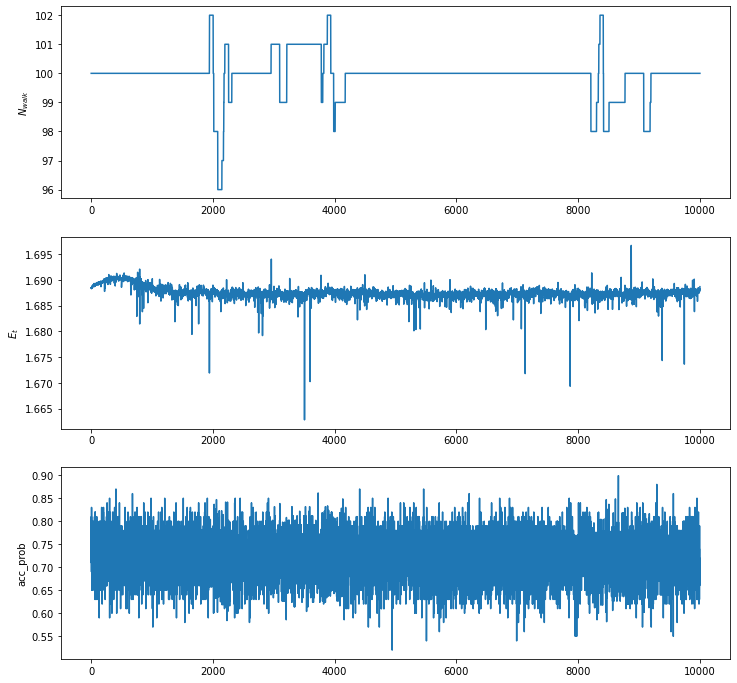

In [37]:
#Single run graph
import numpy as np
import matplotlib.pyplot as plt

run_id = 2
data = np.genfromtxt('equilibration_%d.out' % run_id, skip_header=1)

steps = data[:,0]
Nt = data[:,1]
Et = data[:,2]
acc_prob = data[:,3]

fig ,ax = plt.subplots(3,1, figsize=(12,12))
_ = ax[0].set_ylabel(r'$N_{walk}$')
_ = ax[0].plot(steps, Nt)

_ = ax[1].set_ylabel(r'$E_t$')
_ = ax[1].plot(steps, Et)

_ = ax[2].set_ylabel('acc_prob')
_ = ax[2].plot(steps, acc_prob)


In [27]:
#Many run comparison
import numpy as np
import matplotlib.pyplot as plt

dt = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
data = np.genfromtxt('equilibration_0.out', skip_header=1)
steps = data[:,0]
tot_steps = len(steps)

Nt = np.empty((tot_steps,len(dt)))
Et = np.empty((tot_steps,len(dt)))
acc_prob = np.empty((tot_steps,len(dt)))

for i in range(len(dt)):
    file_id = i
    data = np.genfromtxt('equilibration_%d.out' % file_id, skip_header=1)
    Nt[:,i] = data[:,1]
    Et[:,i] = data[:,2]
    acc_prob[:,i] = data[:,3]

mean_Et = np.empty(len(dt))
mean_acc_prob = np.empty(len(dt))
for i in range(len(dt)):
    mean_Et[i] = np.mean(Et[tot_steps//2:,i])
    mean_acc_prob[i] = np.mean(acc_prob[tot_steps//2:,i])

[0.023542   0.34152301 0.71985542 0.899264   0.95626    0.984718  ]


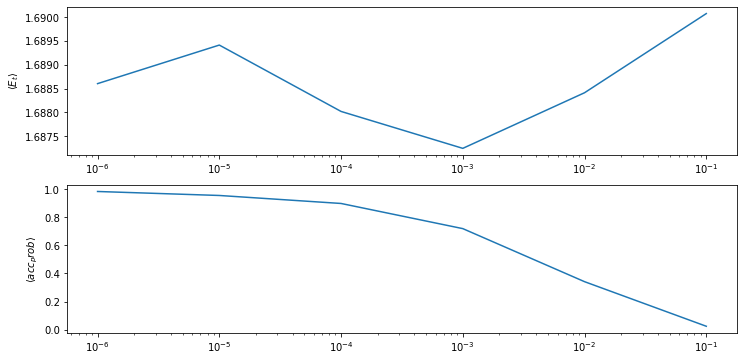

In [32]:
fig, ax = plt.subplots(2,1, figsize=(12,6))

_ = ax[0].set_xscale('log')
_ = ax[0].set_ylabel(r'$\langle E_t \rangle $')
_ = ax[0].plot(dt, mean_Et)

_ = ax[1].set_xscale('log')
_ = ax[1].set_ylabel(r'$\langle {acc_prob} \rangle$')
_ = ax[1].plot(dt, mean_acc_prob) 

print(mean_acc_prob)